# CAB330 Case Study 1: Students

Class: CAB330

Students: 

- Christopher Ayling | christopher.ayling@connect.qut.edu.au
- Benjamin Saljooghi | 9448233 | benjamin.saljooghi@connect.qut.edu.au
- Jordi Smit | 10294139 | jordi.smit@connect.qut.edu.au

Due Date: 9th September 2018

Project Demo: Week 8 Wednesday Lab

Weighting: 25%

---
## Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Manipulating Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from collections import defaultdict

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG, Image
import graphviz
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# Algorithms
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler

C:\Users\chris\Anaconda3\envs\CAB330\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
randomSeed = 330
np.random.seed(randomSeed)

---
## Data Loading

In [4]:
students = pd.read_csv("./STUDENT.csv")
students.head()

rows, columns = students.shape; rows, columns

# organics = pd.read_csv("./organics.csv")
# organics.head()

(1044, 35)

---
## Task 1. Data Selection and Distribution. (4 marks)

### Variable Descriptions

The following information would assist you in assigning the variables roles.

- There are three target variables namely, G1, G2 and G3, with different types. Choose the target that suits best according to the given task.
- Identify if the variable is an input variable or a supplementary variable.
- Data transformation is required for a few input variables to get improved accuracy

### 1.1 Proportion of Students Who Will Pass

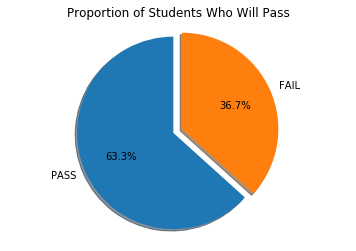

In [5]:
G3_counts = students['G3'].value_counts()
plt.pie(G3_counts, labels=G3_counts.index, startangle=90, shadow=True, explode=(0, 0.1), autopct='%1.1f%%')
plt.title("Proportion of Students Who Will Pass")
plt.axis('equal')
plt.show()

### 1.2 Data Cleaning

In [6]:
cleaned = students.copy()

# impute age NAs with mean
cleaned['age'].fillna(cleaned['age'].mean(), inplace=True)

# impute reason NAs with unknown value because else it will be read as float instead of a string, which cause trouble with the hot one transformation.
cleaned['reason'].fillna("-", inplace=True)

# impute school NAs with unknown value because else it will be read as float instead of a string, which cause trouble with the hot one transformation..
cleaned['school'].fillna("-", inplace=True)

# drop unused columns
cleaned.drop(columns=["id", "InitialName"], inplace=True)

#TODO maby better to remove missing target variable?
# impute G1 NAs with mean
cleaned['G1'].fillna(cleaned['G1'].mean(), inplace=True)

# impute G2 NAs with mean
cleaned['G2'].fillna(cleaned['G2'].mean(), inplace=True)

#TODO Should we also check for outliers or inconsistencies?

### 1.3 Level of Measurement

In [7]:
descriptions = {
    "id": ["student's id", False, False, 'nominal'],
    "InitialName": ["student's initial", False, False, 'nominal'],
    "school": ["student's school name", True, True, 'nominal'],
    "sex": ["student's sex", True, True, 'nominal'],
    "age": ["student's age", True, True, 'numerical'],
    "address": ["student's home address type", True, True, 'nominal'],
    "famsize": ["family size (≤ 3 or > 3)", True, True, 'ordinal'],
    "Pstatus": ["parent's cohabitation status (living together or apart)", True, True, 'nominal'],
    "Medu": ["mother’s education(0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)", True, True, 'ordinal'],
    "Fedu": ["father’s education(0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)", True, True, 'ordinal'],
    "Mjob": ["mother's job", True, True, 'nominal'],
    "Fjob": ["father's job", True, True, 'nominal'],
    "reason": ["reason to choose this school", True, True, 'nominal'],
    "guardian": ["student's guardian", True, True, 'nominal'],
    "traveltime": ["home to school travel time (1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4 – > 1 hour)", True, True, 'ordinal'],
    "studytime": ["weekly study time (1 – < 2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours or 4 – > 10 hours)", True, True, 'ordinal'],
    "failures": ["number of past class failures(n if 1 ≤ n < 3, else 4)", True, True, 'ordinal'],
    "schoolsup": ["extra educational school support (yes or no)", True, True, 'nominal'],
    "famsup": ["family educational support (yes or no)", True, True, 'nominal'],
    "paid": ["extra paid classes (yes or no)", True, True, 'nominal'],
    "activities": ["extra-curricular activities (yes or no)", True, True, 'nominal'],
    "nursery": ["attended nursery school (yes or no)", True, True, 'nominal'],
    "higher": ["wants to take higher education (yes or no)", True, True, 'nominal'],
    "internet": ["Internet access at home (yes or no)", True, True, 'nominal'],
    "romantic": ["with a romantic relationship (yes or no)", True, True, 'nominal'],
    "famrel": ["quality of family relationships (1 – very bad to 5 – excellent)", True, True, 'ordinal'],
    "freetime": ["free time after school (1 – very low to 5 – very high)", True, True, 'ordinal'],
    "goout": ["going out with friends (1 – very low to 5 – very high)", True, True, 'ordinal'],
    "Dalc": ["workday alcohol consumption (1 – very low to 5 – very high)", True, True, 'ordinal'],
    "Walc": ["weekend alcohol consumption (1 – very low to 5 – very high)", True, True, 'ordinal'],
    "health": ["current health status (1 – very bad to 5 – very good)", True, True, 'ordinal'],
    "absences": ["number of school absences (0 to 75)", True, True, 'numerical'],
    "G1": ["first period grade (0 to 20)", True, True, 'numerical', True],
    "G2": ["second period grade (0 to 20)", True, True, 'numerical', True],
    "G3": ["Final result (PASS/FAIL)", True, True, 'nominal', True],
}

red = 'background-color: Tomato'
green = 'background-color: MediumSeaGreen'
blue = 'background-color: DodgerBlue'
sblue = 'background-color: SlateBlue'
violet = 'background-color: Violet'
gray = 'background-color: Lightgray'
orange = 'background-color: Orange'

def highlight_useful(val):
    """ highlight True as green, false as red """
    return '' if val is None else green if val else red

def highlight_type(val):
    """ highlight based on variable type """
    if val == 'nominal':
        return blue
    elif val == 'ordinal':
        return sblue
    elif  val == 'numerical':
        return violet
    
def highlight_target(val):
    """ highlight if target variable """
    return orange if val else gray


COLUMN_INFORMATION = pd.DataFrame.from_dict(descriptions, orient='index')
COLUMN_INFORMATION.columns = ['Description', 'For Classification', 'For Regression', 'Variable Type', 'Target']
COLUMN_INFORMATION = COLUMN_INFORMATION[['Description', 'Target', 'Variable Type', 'For Classification', 'For Regression']]
COLUMN_INFORMATION['Target'] = COLUMN_INFORMATION['Target'].apply(lambda cell: bool(cell))

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    display(
        COLUMN_INFORMATION.style.\
            applymap(highlight_useful, subset=['For Classification', 'For Regression']).\
            applymap(highlight_type, subset='Variable Type').\
            applymap(highlight_target, subset='Target')
    )

,Description,Target,Variable Type,For Classification,For Regression
id,student's id,False,nominal,False,False
InitialName,student's initial,False,nominal,False,False
school,student's school name,False,nominal,True,True
sex,student's sex,False,nominal,True,True
age,student's age,False,numerical,True,True
address,student's home address type,False,nominal,True,True
famsize,family size (≤ 3 or > 3),False,ordinal,True,True
Pstatus,parent's cohabitation status (living together or apart),False,nominal,True,True
Medu,"mother’s education(0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)",False,ordinal,True,True
Fedu,"father’s education(0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)",False,ordinal,True,True


### 1.4 Distribution Scheme

In [8]:
target_variables = ['G3']
features = cleaned.loc[:, cleaned.columns.difference(target_variables)]
targets = cleaned.loc[:, target_variables]

test_size = 0.2
training_size = 1.0 - test_size
X_training, X_test, Y_training, Y_test = train_test_split(features, targets, test_size=test_size, train_size=training_size, random_state=randomSeed, shuffle=False)

---
## Task 2. Predictive Modeling Using Decision Trees

(4 marks)

### 2.1 Build a decision tree using default setting. 

In [9]:
#Create a lable encoder for each of the nominal and ordinal features.
DT_label_encoders = {}
for name in descriptions:
    if ("nominal" in descriptions[name] or "ordinal" in descriptions[name]) and name in cleaned.columns.values.tolist():
        lb = preprocessing.LabelEncoder()
        #Check cleanded data for every possible class. If only done on training data it might miss some.
        lb.fit(cleaned[name].tolist())
        DT_label_encoders[name] = lb 

def transform_features(Data, encoders):
    """Transforms data based on the provided encoder"""
    Data_copy = Data.copy()
    for col_name in Data_copy.columns.values.tolist():
        if col_name in encoders:
            #Get encoder
            encoder = encoders[col_name]
            #Transform the data in this col
            col_values = Data_copy[col_name].tolist()
            Data_copy[col_name] = encoder.transform(col_values)
            
    return Data_copy

def transform_features_to_DT(Data):
    """Transforms the nominal and ordinal features into a format that can be compared by the decision tree"""
    return transform_features(Data, DT_label_encoders)

In [10]:
#Transform the training data into a format with which the decision tree can work.
X_training_decision_tree_format = transform_features_to_DT(X_training) 
Y_training_decision_tree_format = transform_features_to_DT(Y_training) 


#Create a decision tree and train it on the formated training data.
dt = DecisionTreeClassifier(random_state=randomSeed)
dt.fit(X_training_decision_tree_format, Y_training_decision_tree_format)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=330,
            splitter='best')

#### a. What is the classification accuracy on training and test datasets?

In [11]:
#Transform test data
X_test_decision_tree_format = transform_features_to_DT(X_test) 
Y_test_decision_tree_format = transform_features_to_DT(Y_test) 

#Create a dataframe to display the values.
training_score = dt.score(X_training_decision_tree_format, Y_training_decision_tree_format)
test_score = dt.score(X_test_decision_tree_format, Y_test_decision_tree_format)    
dt_preformance = pd.DataFrame([training_score, test_score], columns=target_variables, index=['Train accuracy', 'Test accuracy'])
dt_preformance

,G3
Train accuracy,1.000000
Test accuracy,0.827751


#### b. List the decision rules

In [12]:
dt_features = X_training_decision_tree_format.columns.values.tolist()
dotfile = StringIO()
export_graphviz(dt, out_file=dotfile, feature_names=dt_features)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("default_tree.png") # saved in the following file - will return True if successful

The unique decision rules:
 - G2 <= 10.45
 - G2 <-=9.55
 - G1 <= 9.75
 - goout <=0.5
 - failures <= 0.5
 - sex <= 0.5
 - G2 <= 9.35
 - Medu <= 9.35
 - goout <= 3.5
 - Dalc < 3.5
 - G1 <= 9.85
 - age <= 17.5
 - Fedu <= 1.5
 - Fjob <= 0.5
 - studytime <= 1.0
 - age <= 16.868
 - guardian <= 1.5
 - absences <= 6.0
 - absences <= 9.0
 - G1 <= 11.225
 - famrel <= 2.5
 - walc <= 0.5
 - guardian <= 0.5
 - walc <= 2.5
 - dalc <= 0.5
 - Mjob <= 1.5
 - Medu <= 1.5
 - adress <= 0.5
 - Fedu <= 2.5
 - health <= 3.0
 - school <= 1.5
 - reason <= 2.5
 - freetime <= 2.5
 - G2 <= 11.35
 - G1 <= 11.55
 - traveltime <= 0.5
 - Fjob <= 1.5
 - reason <= 0.5
 - Walc <= 3.5
 - Walc <= 0.5
 - health <= 0.5
 - G1 <= 10.85
 - reason <= 1.5
 - paid <= 0.5
 - activities <= 0.5
 - nursery <= 0.5
 - G1 <= 10.55
 - famrel <= 3.5
 - G2 <= 11.55
 - G1 <= 12.85
 - schoolsup <= 0.5
 - absences <= 1.0
 - goout <= 05
 - Walc < 3.5

The complete decision tree:

![](default_tree.png)


#### c. What are the 5 important variables in building the tree?

In [13]:
importances = dt.feature_importances_
importances_dt = pd.DataFrame(importances, index=dt_features, columns=["G3"])
importances_dt.nlargest(5, "G3")

,G3
G2,0.732581
G1,0.053456
Walc,0.031882
Fedu,0.018104
health,0.014787


#### d. Report if you see any evidence of model overfitting.

There is model overfitting on the training set since the decision tree has a 100% accuracy at the training set while it only has a 82.8% accuracy on the test set. This can also be seen in the tree since it has become extremely complicated with very many paths. This a classic example of overfitting.

### 2.2 Build another decision tree tuned with GridSearchCV.

In [ ]:
#The parameters to be searched
parameters = {
     "max_depth": [None, 1, 2, 3, 4, 5],
     "min_samples_split": [0.001, 0.005, 0.01, 0.05, 0.1],
     "min_samples_leaf": [1, 2, 4, 8, 16, 32],
     "criterion": ['gini', 'entropy'],
     "splitter" : ["best", "random"],
     "max_features": [None, "auto", "sqrt", "log2"],
     "max_leaf_nodes": [None, 2, 3, 4, 5, 6],
}
#creates and starts a grids search
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=randomSeed), parameters, n_jobs=8)
gs_dt.fit(X_training_decision_tree_format, Y_training_decision_tree_format)

#### a. What is the classification accuracy on training and test datasets?

In [ ]:
#Calc scores
training_score = gs_dt.score(X_training_decision_tree_format, Y_training_decision_tree_format)
test_score = gs_dt.score(X_test_decision_tree_format, Y_test_decision_tree_format)

#Display training and test score
dt_grid_preformance = pd.DataFrame([training_score, test_score], columns=["G3 grid"], index=['Train accuracy', 'Test accuracy'])
dt_grid_preformance

#### b. What are the parameters used? Explain your decision.

The following parameters are being considered: 
 - **max_depth**: Limits the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
 - **min_samples_split**: The minimum number of samples required to split an internal node.
 - **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
 - **criterion**: The function to measure the quality of a split. Examples are Gini impurity and entropy/information gain.
 - **splitter**: The strategy used to choose the split at each node. Examples are best which choices the best criterion criteria or random which preforms a random split.
 - **max_features**:  Limits the number of features to consider when looking for the best split. For Example sqrt limits it to sqrt (total_number_of_features).
 - **max_leaf_nodes**:  Limits the number of leaf nodes. Nodes with relative reduction in impurity are added first to ensure the best possible tree with the constaint.
 
We decided to use the kitchen sink approach. We looked up the default values of the parameters and provided the grid search with a random range of values arround these default values. Then we the GridSearch run on multiple threads/jobs and we see which parameters return the optimal values.



#### c. What are the optimal parameters for this decision tree?

In [ ]:
print(f"The following parameters result in the best decision tree:")
for name in parameters:
    print(f"   -{name}: {gs_dt.best_params_[name]}")

#### d. Which variable is used for the first split? What are the competing splits for this first split?

In [ ]:
dt_features = X_training_decision_tree_format.columns.values.tolist()
dotfile = StringIO()
export_graphviz(gs_dt.best_estimator_, out_file=dotfile, feature_names=dt_features)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("grid_tree.png") # saved in the following file - will return True if successful


The first split is done based on the following rule: G2 <= 10.45. The split rules at the second level are G2 <= 9.55 & G2 <= 11.35.
Which is the same as the tree with the default parameter. The only different is that this tree has far less leaf nodes.

The result:

![](grid_tree.png)

#### e. What are the 5 important variables in building the tree?

In [ ]:
#Get the importances of each feature
importances = gs_dt.best_estimator_.feature_importances_

#display the 5 most important features
importances_dt_gs = pd.DataFrame(importances, index=dt_features, columns=["G3"])
importances_dt_gs
importances_dt_gs.nlargest(5, "G3")

#### f. Report if you see an evidence of model overfitting.

There is no evidence of model overfitting, the accuracy on the train and test sets moved much closer to each other. The tree has also become much simpler compared to the original one as can be seen in the visualization image. This is also a good indicater that there is no overfitting.

### 2.3 What is the significant difference do you see between these two decision tree models? How do they compare performance-wise? Explain why those changes may have happened.

**What is the significant difference do you see between these two decision tree models?**
When you compare the visualization of the trees, the first thing you notice is that the grid tree is much smaller and simpler than the original one. 
The grid tree also does not have duplicated rules. The original thee had some duplicated rules in different branches. The original tree did this to fit the training data perfectly which resulted into over-fitting.

**How do they compare performance-wise**
The original tree fitted the training data perfectly  but only achieved an 82% accuracy on the test data due to over-fitting. While the grid tree only achieve a 93% accuracy on the training data, it achieved a 86% accuracy on the test data. Thus the grid tree is much better at generalizing, which result into a higher accuracy on data it has never seen before. Making the grid tree the better one.

**Explain why those changes may have happened**
These changes happen due to the grid search. Sklearning's grid search uses K-fold validation on each possible configuration. The K-fold validation prevents
 the training algorithm from over-fitting in combination with the configuration parameters. Eventually the search returns the configuration that has the highest K-fold score which result into a tree data is not over-fitted (assuming that the training data is representative).
In our case this resulted into a much smaller tree. A much smaller tree means that there are fewer rules and that the decision rules are much more general and have to focus on the most important features. This means that the tree cannot perfectly fit the training data and over-fit, which makes it preform better on data it has never seen before.

In [ ]:
comparision = pd.DataFrame([], columns=[])
comparision.append(dt_preformance["G3"]).append(dt_grid_preformance["G3 grid"]).transpose()

### 2.4 From the better model, can you identify which students to target for further consultation? Can you provide some descriptive summary of those students?

The following rules identify students that will most likely fail.

- `if G2 <= 9.55` There are 206 students in this group and 95.6% of them eventually failed. So this is the most important group to watch.
- `if 9.55 < G2 <= 10.45 & G1 <= 11.225` There are 73 students in this group and 72.6% of them eventually failed. So this is the second most important group to watch.

The following rules are far less interesting but still indicate students with a small changes of failing. 
- `if 10.45 < G2 <= 11.35 & G1 <= 11.55` There are 77 students in this group and 27.3% of them eventually failed.
- `if 9.55 < G2 <= 10.45 & G1 > 11.225` There are 16 students in this group and 18.8% of them eventually failed. 

As can be seen in the rules above only the grades provide a good indication about wheter the students will pass or not.

---
# Task 3. Predictive Modeling Using Regression

(5.5 marks)

## 3.1 Apply transformation/scaling methods to variables.

In [ ]:
# TODO: Try two models; one with OH encoded ordinals and one without
# TODO: Compare LinearRegression against LogisticRegression

def one_hot(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = data.drop(column, axis=1)
    data = data.join(dummies)
    return data

def binary(data, column, map):
    new_col = data[column].map(map)
    data = data.drop(column, axis=1)
    data = data.join(new_col)
    return data
    
def transform(data):
    one_hot_cols = ['school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']
    yes_no_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    yes_no_map = {'no':0, 'yes':1}
    
    for col in one_hot_cols:
        data = one_hot(data, col)
    
    for col in yes_no_cols:
        data = binary(data, col, yes_no_map)
    
    data = binary(data, 'sex', {'F':0, 'M':1})
    data = binary(data, 'famsize', {'LE3':0, 'GT3':1})
    data = binary(data, 'Pstatus', {'A':0, 'T':1})
    data = binary(data, 'G3', {'FAIL':0, 'PASS':1})    
    return data

# get a copy of the data set
reg_data = cleaned.copy(deep=True)

# apply transformations
reg_data = transform(reg_data)

# visualize transformed data
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(reg_data)

# split transformed data into features and targets
reg_features = reg_data.loc[:, reg_data.columns.difference(target_variables)]
reg_targets = reg_data.loc[:, target_variables]

# train test split the transformed data
reg_X_train, reg_X_test, reg_Y_train, reg_Y_test = train_test_split(reg_features, reg_targets, test_size=test_size, train_size=training_size, random_state=randomSeed, shuffle=False)
    
# convert to numpy matrices
reg_X_train_array = reg_X_train.values
reg_X_test_array = reg_X_test.values
reg_Y_train_array = reg_Y_train.values
reg_Y_test_array = reg_Y_test.values

# make Y arrays one-dimensional
reg_Y_train_array =  np.ravel(reg_Y_train_array)
reg_Y_test_array = np.ravel(reg_Y_test_array)

# apply scaling
scaler = StandardScaler()
# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
reg_X_train_array = scaler.fit_transform(reg_X_train_array, reg_Y_train_array)    
# transform the test data with the scaler that was trained on the training data
reg_X_test_array = scaler.transform(reg_X_test)

## 3.2 Build regression models 

### Without GridSearchCV

In [ ]:
# train model
model = LogisticRegression()

model.fit(reg_X_train_array, reg_Y_train_array)

# training and test accuracy
print("Train accuracy:", model.score(reg_X_train_array, reg_Y_train_array))
print("Test accuracy:", model.score(reg_X_test_array, reg_Y_test_array), "\n")

# get Y predictions
y_pred = model.predict(reg_X_test_array)

# flatten Y arrays
# y_pred = [item for sublist in y_pred for item in sublist]
# reg_Y_test = [item for sublist in reg_Y_test for item in sublist]\

print(classification_report(reg_Y_test_array, y_pred))

# visualize accuracy
my_df = pd.DataFrame({'Actual': reg_Y_test_array, 'Predicted': y_pred})  
display(my_df)

### With GridSearchCV

In [ ]:
coef = model.coef_[0]
feature_names = reg_X_train.columns

indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

    

### a. Report which variables are included in the regression model.

### b. Report the top-5 important variables.

In [ ]:
for i in indices[:5]:
    print(feature_names[i], ":", coef[i])    

### c. Report any sign of overfitting.

### d. What are the parameters used?

In [ ]:
# explain your decision

In [ ]:
# What are the optimal parameters

In [ ]:
# Which regression function is being used?

### e. What is the classification accuracy on training and test datasets?

## 3.3 Build another regression model using the subset of inputs selected by RFE and selection by model methods

###  Report which variables are included in the regression model.

### b. Report the top-5 important variables.

### c. Report any sign of overfitting.

### d. What is the classification accuracy on training and test datasets?

## 3.4 Which of the regression models appears to be better?

In [ ]:
# Use comparison statistics

# Is there any difference between two models (i.e one with selected variables and another with all variables)? 

# Explain why those changes may have happened.

## 3.5 From the better model, can you identify which students to target? 

In [ ]:
# Can you provide some descriptive summary of those students?

---
## Task 4. Predictive Modeling Using Neural Networks

(5.5 marks)

### 1. Build a Neural Network model using the default setting.

In [ ]:
Xtr_nn, ytr_nn = X_training_decision_tree_format, Y_training_decision_tree_format
Xte_nn, yte_nn = X_test_decision_tree_format, Y_test_decision_tree_format

In [ ]:
goal = "G3"

In [ ]:
mlp = MLPClassifier()
mlp.fit(Xtr_nn, ytr_nn[goal])

#### a. What is the network architecture of the model?

In [ ]:
print(f"the default neural network has {len(mlp.hidden_layer_sizes)} hidden layers(s) of size {mlp.hidden_layer_sizes}")

#### b. How many iterations are needed to train this network?

In [ ]:
print(f"the default neural network trained for {len(mlp.loss_curve_)} iterations")

#### c. Do you see any sign of over-fitting?

In [ ]:
mlp.score(Xte_nn, yte_nn[goal])

In [ ]:
plt.plot(mlp.loss_curve_)

#### d. Did the training process converge and result in the best model?

In [ ]:
mlp.best_loss_, mlp.loss_

#### e. What is the classification accuracy on the training and test datasets?

In [ ]:
print(f"The classification on the training set compared to the test set is {mlp.score(Xtr_nn, ytr_nn[goal])}/{mlp.score(Xte_nn, yte_nn[goal])}")

### 2. Refine this network by refining is with GridSearchCV.

In this section a neural network's hyperparameters are tuned using GridSearchCV.

* `hidden_layer_size` was optimized to ensure that that a the complexity of the model was appropriate for the problem
* `activation` was optimized to ensure that the activation function of the model is capaable of representing the problm. Relu is max(0, x) and allows only relevant signals to pass through to the next layer. tanh is good when the sign of the signal is relevant but the magnitude needs to be limited. logistic is a mix of the two.

source: https://www.quora.com/How-should-I-choose-a-proper-activation-function-for-the-neural-network?share=1

In [ ]:
params = {
    "hidden_layer_sizes": [25, 50, 100, 150, 200],
    "activation": ['logistic', 'tanh', 'relu'],
}

plt.plot(mlp.loss_curve_)
gs_mlp = GridSearchCV(MLPClassifier(max_iter=1000), params, n_jobs=-1).fit(Xtr_nn, ytr_nn[goal])
display(
    f"train acc:{gs_mlp.score(Xtr_nn, ytr_nn[goal])} test acc: {gs_mlp.score(Xte_nn, yte_nn[goal])}",
    f"best loss: {mlp.best_loss_} loss:{mlp.loss_}",
    gs_mlp
)

### 3. Build  another Neural Network with inputs selected from RFE with regression.

(Use the best model generated in Task 3) and selection with decision tree (use the best model from Task 2).

#### a. Did feature selection help here? Any changes in network architecture? What inputs are being used?

#### b. What is the classification accuracy on the train and test datasets? Any improvements?

#### c. How many iteration are needed to train this network?

#### d. Do you see any sign of over-fitting?

#### e. Did the training process converge and result in the best model?

#### f. Use GridSearchCV to tune the network to see whether the change in network architecture can further improve the performance.

### 3. Using the comparison methods, Which appears to be better?

From the better model, can you identify which customers to target? Can you provide some descriptive summary of those customers?

---
## Task 5. Comparing Predictive Models

(4 marks)

### 1. Using the comparison methods to compare the best decsision tree model, the best regression model...

#### a. Discuss the findings led by (a) ROC Chart and Index; (b) Accuracy Score; (c) Classification Report.

#### b. Do all the mdoels agree on the customers' characteristics? How do they vary?

### 2. Finally, based on all models and analysis, is there a particular model you will use in decision making?

### 3. Can you summarise positives and negaitives of each modelling method based on this analysis?

## Conclusion

In conclusion ...